In [31]:
#Importing Dependencies 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white') 

In [10]:
col=['user_id','item_id','rating','timestamp'] 

In [11]:
df=pd.read_csv('u.data',sep='\t',names=col)

In [12]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [13]:
movies=pd.read_csv('Movie_Id_Titles')

In [14]:
movies.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [16]:
df=pd.merge(df,movies,on='item_id')

In [17]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [29]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [30]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [39]:
ratings_mean=pd.DataFrame(df.groupby('title')['rating'].mean())

In [40]:
ratings_mean.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [41]:
ratings_mean['no of ratings']=pd.DataFrame(df.groupby('title')['rating'].count())

In [42]:
ratings_mean.head()

,rating,no of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [43]:
#Visualizations 

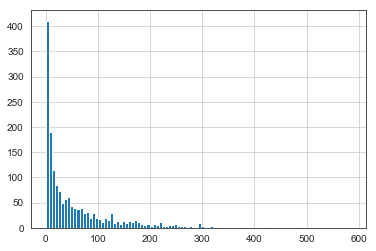

In [48]:
ratings_mean['no of ratings'].hist(bins=100)

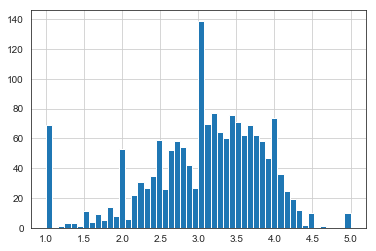

In [53]:
ratings_mean['rating'].hist(bins=50)

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


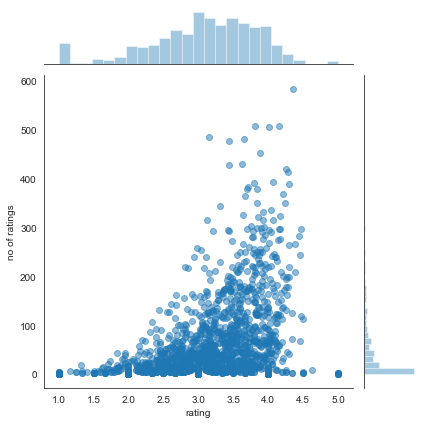

In [54]:
sns.jointplot(x='rating',y='no of ratings',data=ratings_mean,alpha=0.5)

In [56]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [57]:
moviematrix=df.pivot_table(index='user_id',columns='title',values='rating')

In [58]:
moviematrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
ratings_mean.sort_values('no of ratings',ascending=False)

,rating,no of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [63]:
contact_user_rating=moviematrix['Contact (1997)']
titanic_user_rating=moviematrix['Titanic (1997)']

In [64]:
contact_user_rating.head()

user_id
0    NaN
1    5.0
2    3.0
3    2.0
4    5.0
Name: Contact (1997), dtype: float64

In [67]:
similar_to_contact_user_rating=moviematrix.corrwith(contact_user_rating)

C:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [68]:
similar_to_titanic_user_rating=moviematrix.corrwith(titanic_user_rating)

In [69]:
contact_corr=pd.DataFrame(similar_to_contact_user_rating,columns=['Correlation'])

In [70]:
contact_corr

,Correlation
title,
'Til There Was You (1997),0.904534
1-900 (1994),NaN
101 Dalmatians (1996),-0.108441
12 Angry Men (1957),0.022265
187 (1997),0.135512
2 Days in the Valley (1996),0.248031
"20,000 Leagues Under the Sea (1954)",0.052442
2001: A Space Odyssey (1968),0.014245
3 Ninjas: High Noon At Mega Mountain (1998),NaN


In [71]:
contact_corr.dropna(inplace=True)

In [72]:
contact_corr

,Correlation
title,
'Til There Was You (1997),0.904534
101 Dalmatians (1996),-0.108441
12 Angry Men (1957),0.022265
187 (1997),0.135512
2 Days in the Valley (1996),0.248031
"20,000 Leagues Under the Sea (1954)",0.052442
2001: A Space Odyssey (1968),0.014245
"39 Steps, The (1935)",-0.538617
8 1/2 (1963),-0.076123


In [74]:
contact_corr.sort_values('Correlation',ascending=False)

,Correlation
title,
Lamerica (1994),1.000000
Faust (1994),1.000000
"Wedding Gift, The (1994)",1.000000
"Visitors, The (Visiteurs, Les) (1993)",1.000000
King of the Hill (1993),1.000000
Gold Diggers: The Secret of Bear Mountain (1995),1.000000
For Ever Mozart (1996),1.000000
"Innocent Sleep, The (1995)",1.000000
Harlem (1993),1.000000


In [75]:
contact_corr=contact_corr.join(ratings_mean['no of ratings'])

In [76]:
contact_corr.head()

,Correlation,no of ratings
title,,
'Til There Was You (1997),0.904534,9
101 Dalmatians (1996),-0.108441,109
12 Angry Men (1957),0.022265,125
187 (1997),0.135512,41
2 Days in the Valley (1996),0.248031,93


In [79]:
contact_corr[contact_corr['no of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,no of ratings
title,,
Contact (1997),1.000000,509
Philadelphia (1993),0.446509,137
"Mask, The (1994)",0.418328,129
Young Guns (1988),0.388839,101
Sling Blade (1996),0.384840,136


In [90]:
titanic_corr=pd.DataFrame(similar_to_titanic_user_rating,columns=['Correlation'])

In [91]:
titanic_corr

,Correlation
title,
'Til There Was You (1997),-0.062017
1-900 (1994),NaN
101 Dalmatians (1996),0.120113
12 Angry Men (1957),0.077700
187 (1997),0.315654
2 Days in the Valley (1996),0.017295
"20,000 Leagues Under the Sea (1954)",0.246718
2001: A Space Odyssey (1968),-0.042024
3 Ninjas: High Noon At Mega Mountain (1998),NaN


In [92]:
titanic_corr.dropna(inplace=True)

In [93]:
titanic_corr

,Correlation
title,
'Til There Was You (1997),-0.062017
101 Dalmatians (1996),0.120113
12 Angry Men (1957),0.077700
187 (1997),0.315654
2 Days in the Valley (1996),0.017295
"20,000 Leagues Under the Sea (1954)",0.246718
2001: A Space Odyssey (1968),-0.042024
"39 Steps, The (1935)",0.155752
8 1/2 (1963),-0.039301


In [85]:
titanic_corr.sort_values('Correlation',ascending=False)

,Correlation
title,
Lamerica (1994),1.000000
Faust (1994),1.000000
"Wedding Gift, The (1994)",1.000000
"Visitors, The (Visiteurs, Les) (1993)",1.000000
King of the Hill (1993),1.000000
Gold Diggers: The Secret of Bear Mountain (1995),1.000000
For Ever Mozart (1996),1.000000
"Innocent Sleep, The (1995)",1.000000
Harlem (1993),1.000000


In [94]:
titanic_corr=titanic_corr.join(ratings_mean['no of ratings'])

In [95]:
titanic_corr

,Correlation,no of ratings
title,,
'Til There Was You (1997),-0.062017,9
101 Dalmatians (1996),0.120113,109
12 Angry Men (1957),0.077700,125
187 (1997),0.315654,41
2 Days in the Valley (1996),0.017295,93
"20,000 Leagues Under the Sea (1954)",0.246718,72
2001: A Space Odyssey (1968),-0.042024,259
"39 Steps, The (1935)",0.155752,59
8 1/2 (1963),-0.039301,38


In [96]:
titanic_corr[titanic_corr['no of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,no of ratings
title,,
Titanic (1997),1.000000,350
"River Wild, The (1994)",0.497600,146
"Abyss, The (1989)",0.472103,151
Bram Stoker's Dracula (1992),0.443560,120
True Lies (1994),0.435104,208
